In [4]:
from nltk.corpus import reuters
from collections import Counter

counts = Counter(reuters.words())
total_count = len(reuters.words())

In [7]:
# normalizing counts
for word in counts:
    counts[word] /= float(total_count)

In [20]:
from functools import reduce
from operator import mul

#apply a function cumutatively to all elements of sequence
print(reduce(mul, [counts[w] for w in text], ))

3.1996153484163193e-306


### BIGRAMS

In [22]:
from nltk import bigrams, trigrams
from collections import defaultdict

In [ ]:
#initialize a nested dict
bigram_model = defaultdict( lambda: defaultdict(lambda : 0))

for sent in reuters.sents():
    for w1, w2 in bigrams(sent, pad_right=  True, pad_left = True):
        bigram_model[(w1)][w2] += 1
        

In [37]:
#counts to probabilities
for w1 in bigram_model:
    total_count = float(sum(bigram_model[w1].values()))
    for w2 in bigram_model[w1]:
        bigram_model[w1][w2] /= total_count

### TRIGRAMS

In [42]:
trigram_model = defaultdict(lambda : defaultdict(lambda :0))

for sent in reuters.sents():
    for w1, w2, w3 in trigrams(sent, pad_right = True, pad_left = True):
        trigram_model[(w1 ,w2)][w3] += 1

        
for w1_w2 in trigram_model:
    total = float(sum(trigram_model[w1_w2].values()))
    for w3 in trigram_model[w1_w2]:
        trigram_model[w1_w2][w3] /= total

In [62]:
# Generate using trigram model
import random
text = [None, None]
finish = False

while not finish:
    r = random.random()
    acc = .0
    for word in trigram_model[ tuple(text[-2:]) ].keys():
        acc += trigram_model[ tuple(text[-2:])][word]
        if acc >= r:
            text.append(word)
            break
    if text[-2:] == [None, None]:
        finish = True
    
print(' '.join(text[2:-2]))

But it said bills maturing in official hands and the Reagan administration recently because Secretary of Agriculture official said that the American Stock Exchange gold index has a 48 - 1 / 16 pct of the stock price has been a flood of new " B " share 1 . 35 )


## Now using NLTK LM API

In [65]:
from nltk.util import pad_sequence, everygrams
from nltk.lm.preprocessing import pad_both_ends, flatten
from nltk.lm import MLE

In [71]:
model = MLE(3)

data = [list(trigrams(sent)) for sent in reuters.sents()]
model.fit(text = data[700 : ], vocabulary_text = reuters.words())

#### Evaluating Language Models using Perplexity

In [72]:
test = data[: 700]
model.perplexity(test)

inf

## Smoothing

#### Laplace

In [75]:
from nltk.lm.models import Laplace
smooth_model= Laplace(order= 3)

In [76]:
smooth_model.fit(data[700 : ], vocabulary_text= reuters.words())

In [77]:
# Out of Vocabulary Word 
#without smoothing
print( model.score("economy", ["what", "the"]))

#with smoothing
print( smooth_model.score("economy", ["what", "the"]))

0.0
2.401133334934089e-05


#### Laplace smoothing on a unigram model

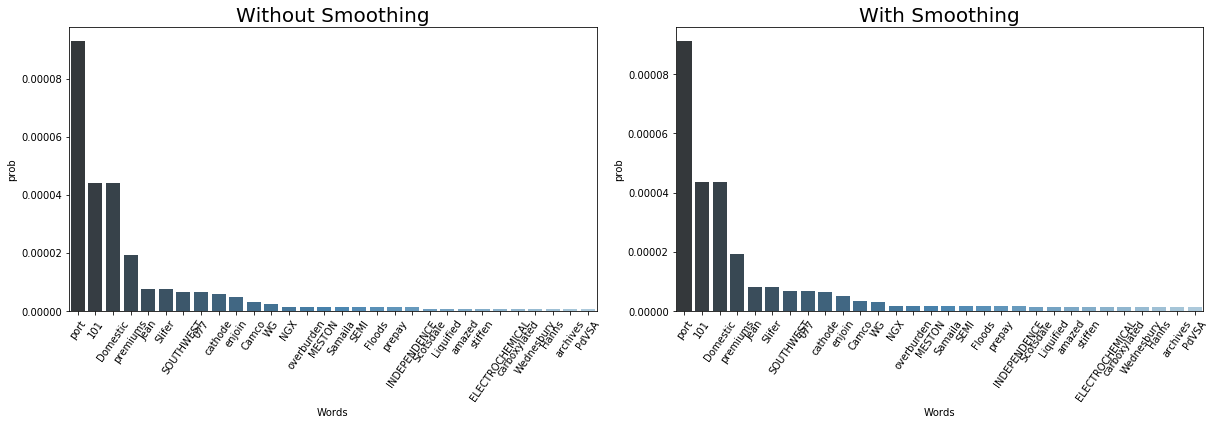

In [83]:
from collections import Counter
# frequency counts of words
counts_smooth = Counter(reuters.words())
N = len(reuters.words())
unique= len(counts_smooth)

for word in counts_smooth:
    counts_smooth[word]= (counts_smooth[word] + 1) / (N + unique)

from random import sample
random_words= sample(list(counts.keys()), 30)


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize= (17, 6))
plt.subplot(1, 2, 1)
plt.title("Without Smoothing", fontsize= 20)
df_1= pd.DataFrame({'Words': random_words, 'prob':[counts[word] for word in random_words]})
df_1= df_1.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_1,  ci=None)
plt.xticks(rotation= 55)
plt.subplot(1, 2, 2)
plt.title("With Smoothing", fontsize= 20)
df_2= pd.DataFrame({'Words': random_words, 'prob':[counts_smooth[word] for word in random_words]})
df_2= df_2.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_2,  ci=None)
plt.xticks(rotation= 55)
plt.tight_layout()
plt.show()



#### LidStone Smoothing

In [85]:
from nltk.lm.models import Lidstone
smooth_model= Lidstone(order= 3, gamma= 0.01)

smooth_model.fit(data[700:], vocabulary_text= reuters.words())

# Out of Vocabulary Word 
#without smoothing
print( model.score("economy", ["what", "the"]))

#with smoothing
print( smooth_model.score("economy", ["what", "the"]))

0.0
2.1644553148200257e-05


In [88]:
smooth_model.perplexity(test)

41600.99999999629

#### Lidstone Smoothing on our unigram model¶


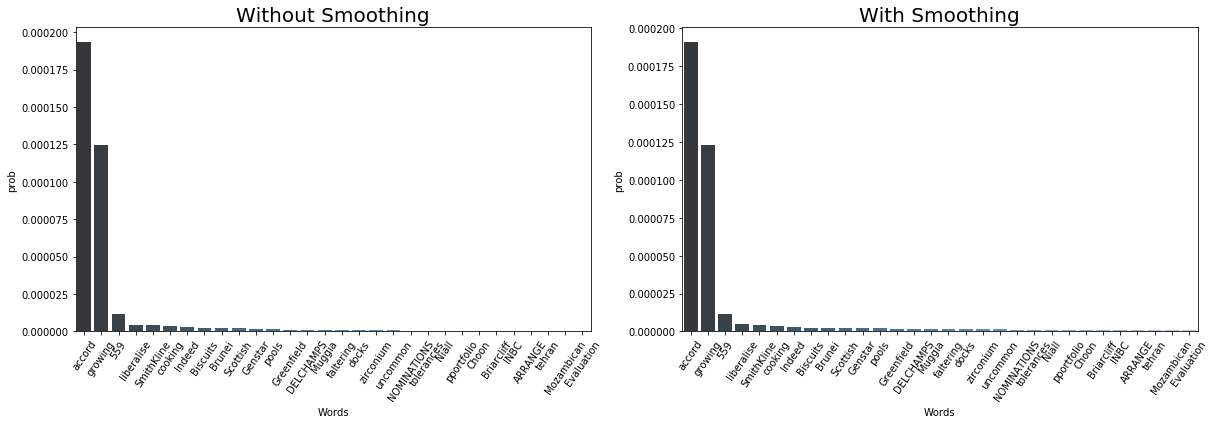

In [91]:
from collections import Counter
# frequency counts of words
counts_smooth = Counter(reuters.words())
N = len(reuters.words())
unique= len(counts_smooth)

gamma= 0.6
for word in counts_smooth:
    counts_smooth[word]= (counts_smooth[word] + gamma) / (N + (unique*gamma))


from random import sample
random_words= sample(list(counts.keys()), 30)


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize= (17, 6))
plt.subplot(1, 2, 1)
plt.title("Without Smoothing", fontsize= 20)
df_1= pd.DataFrame({'Words': random_words, 'prob':[counts[word] for word in random_words]})
df_1= df_1.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_1,  ci=None)
plt.xticks(rotation= 55)
plt.subplot(1, 2, 2)
plt.title("With Smoothing", fontsize= 20)
df_2= pd.DataFrame({'Words': random_words, 'prob':[counts_smooth[word] for word in random_words]})
df_2= df_2.sort_values(by= 'prob', ascending= False)
sns.barplot('Words', 'prob', palette="Blues_d", data= df_2,  ci=None)
plt.xticks(rotation= 55)
plt.tight_layout()
plt.show()

#### Back Off and Interpolation¶


##### Lambda Conditional On Context¶
Kneser-Ney Smoothing One of the most commonly used and best performing n-gram smoothing methods is the interpolated Kneser-Ney algorithm

In [ ]:
#Interpolated Model with Kneser-Ney Smoothing
from nltk.lm.smoothing import KneserNey
from nltk.lm.smoothing import WittenBell
from nltk.lm.models import InterpolatedLanguageModel

ILMmodel1 = InterpolatedLanguageModel(order= 3, smoothing_cls= KneserNey)
ILMmodel1.fit(text= data[700:], vocabulary_text= reuters.words())
# print( ILMmodel1.perplexity(test))


ILMmodel2 = InterpolatedLanguageModel(order= 3, smoothing_cls= WittenBell)
ILMmodel2.fit(text= data[700:], vocabulary_text= reuters.words())
# print(ILMmodel2.perplexity(test))
